## Classes and modules

In [1]:
#Lets have matplotlib "inline"
%matplotlib inline

import os
import sys

#Import packages we need
import numpy as np
from netCDF4 import Dataset
import datetime
from IPython.display import display

#For plotting
import matplotlib
from matplotlib import pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable

plt.rcParams["lines.color"] = "w"
plt.rcParams["text.color"] = "w"
plt.rcParams["axes.labelcolor"] = "w"
plt.rcParams["xtick.color"] = "w"
plt.rcParams["ytick.color"] = "w"

GPU Ocean-modules:

In [2]:
from gpuocean.SWEsimulators import CDKLM16
from gpuocean.utils import IPythonMagic, NetCDFInitialization, OceanographicUtilities

In [3]:
%cuda_context_handler gpu_ctx

# Sampling GRF (naive)

In [4]:
source_url = "/sintef/data/NorKyst800/NorKyst-800m_ZDEPTHS_his.an.2019071600.nc"

data_args = NetCDFInitialization.getInitialConditionsNorKystCases(source_url, "lofoten", download_data=False)

In [8]:
data_args["NX"], data_args["NY"] = 50, 50

In [13]:
N_grid = data_args["NY"]*data_args["NX"]
dists = np.zeros((N_grid,N_grid), dtype=np.float32)
for y in range(data_args["NY"]):
    print(y)
    for x in range(data_args["NX"]):
        for j in range(data_args["NY"]):
            for i in range(data_args["NX"]):
                dists[y*data_args["NX"] + x, j*data_args["NX"] + i] = np.sqrt((y-j)**2 + (x-i)**2)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49


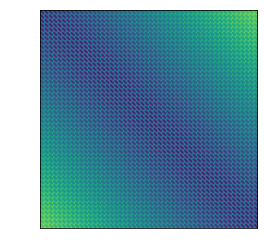

In [14]:
plt.imshow(dists)

In [48]:
phi = 0.25
corr = (1+phi*dists)*np.exp(-phi*dists)

In [49]:
from scipy.linalg import cholesky

In [50]:
C = cholesky(corr)

In [51]:
C.shape

(2500, 2500)

In [52]:
grf = np.reshape(C @ np.random.multivariate_normal(np.zeros(2500), np.eye(2500)), (50,50))

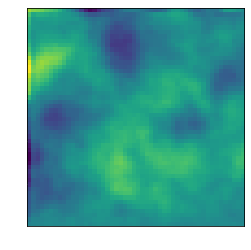

In [53]:
plt.imshow(grf)